In [2]:
from pandas import *
from numpy import *

In [3]:
melbourne_data = read_csv ('C:\\Users\\DELL\\Desktop\\melbournedata\\melb_data.csv')

In [4]:
melbourne_data.head (5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,03-12-2016,2.5,3067,...,1,1.0,202,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019
1,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,04-02-2016,2.5,3067,...,1,0.0,156,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019
2,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,04-03-2017,2.5,3067,...,2,0.0,134,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019
3,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,04-03-2017,2.5,3067,...,2,1.0,94,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019
4,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,04-06-2016,2.5,3067,...,1,2.0,120,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019


In [5]:
print (melbourne_data.shape)

(13580, 21)


In [6]:
print(melbourne_data.describe())

              Rooms         Price      Distance      Postcode      Bedroom2  \
count  13580.000000  1.358000e+04  13580.000000  13580.000000  13580.000000   
mean       2.937997  1.075684e+06     10.137776   3105.301915      2.914728   
std        0.955748  6.393107e+05      5.868725     90.676964      0.965921   
min        1.000000  8.500000e+04      0.000000   3000.000000      0.000000   
25%        2.000000  6.500000e+05      6.100000   3044.000000      2.000000   
50%        3.000000  9.030000e+05      9.200000   3084.000000      3.000000   
75%        3.000000  1.330000e+06     13.000000   3148.000000      3.000000   
max       10.000000  9.000000e+06     48.100000   3977.000000     20.000000   

           Bathroom           Car       Landsize  BuildingArea    YearBuilt  \
count  13580.000000  13518.000000   13580.000000   7130.000000  8205.000000   
mean       1.534242      1.610075     558.416127    151.967650  1964.684217   
std        0.691712      0.962634    3990.669241   

In [8]:
melbourne_data.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  int64  
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  int64  
 10  Bedroom2       13580 non-null  int64  
 11  Bathroom       13580 non-null  int64  
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  int64  
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [130]:
print (melbourne_data ['Suburb'].value_counts())

Reservoir             359
Richmond              260
Bentleigh East        249
Preston               239
Brunswick             222
                     ... 
Yarra Glen              1
Healesville             1
Rockbank                1
Beaconsfield Upper      1
Brookfield              1
Name: Suburb, Length: 314, dtype: int64


In [10]:
print (melbourne_data['Type'].value_counts())

h    9449
u    3017
t    1114
Name: Type, dtype: int64


In [12]:
print (melbourne_data ['Method'].value_counts())

S     9022
SP    1703
PI    1564
VB    1199
SA      92
Name: Method, dtype: int64


In [133]:
print (melbourne_data['Type'].value_counts())

h    9449
u    3017
t    1114
Name: Type, dtype: int64


In [11]:
print (melbourne_data ['Method'].value_counts())

S     9022
SP    1703
PI    1564
VB    1199
SA      92
Name: Method, dtype: int64


In [135]:
print (melbourne_data ['CouncilArea'].value_counts())

Moreland             1163
Boroondara           1160
Moonee Valley         997
Darebin               934
Glen Eira             848
Stonnington           719
Maribyrnong           692
Yarra                 647
Port Phillip          628
Banyule               594
Bayside               489
Melbourne             470
Hobsons Bay           434
Brimbank              424
Monash                333
Manningham            311
Whitehorse            304
Kingston              207
Whittlesea            167
Hume                  164
Wyndham                86
Knox                   80
Maroondah              80
Melton                 66
Frankston              53
Greater Dandenong      52
Casey                  38
Nillumbik              36
Yarra Ranges           18
Cardinia                8
Macedon Ranges          7
Moorabool               1
Unavailable             1
Name: CouncilArea, dtype: int64


In [13]:
print (melbourne_data ['Regionname'].value_counts().sort_values (ascending=True))

Western Victoria                32
Northern Victoria               41
Eastern Victoria                53
South-Eastern Metropolitan     450
Eastern Metropolitan          1471
Western Metropolitan          2948
Northern Metropolitan         3890
Southern Metropolitan         4695
Name: Regionname, dtype: int64


In [137]:
print (melbourne_data ['Suburb'].value_counts)

<bound method IndexOpsMixin.value_counts of 0           Abbotsford
1           Abbotsford
2           Abbotsford
3           Abbotsford
4           Abbotsford
             ...      
13575    Wheelers Hill
13576     Williamstown
13577     Williamstown
13578     Williamstown
13579       Yarraville
Name: Suburb, Length: 13580, dtype: object>


In [14]:
print (melbourne_data.isnull().sum ().sort_values (ascending = False))

BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Car                62
Suburb              0
Bathroom            0
Regionname          0
Longtitude          0
Lattitude           0
Landsize            0
Bedroom2            0
Address             0
Postcode            0
Distance            0
Date                0
SellerG             0
Method              0
Price               0
Type                0
Rooms               0
Propertycount       0
dtype: int64


In [20]:
melbourne_data ['Bedroom2'].fillna(melbourne_data['Bedroom2'].median (), axis = 0, inplace=True)
melbourne_data ['Bathroom'].fillna(melbourne_data ['Bathroom'].median (),axis = 0, inplace = True)
melbourne_data ['Car'].fillna (melbourne_data ['Car'].median (), axis = 0, inplace = True)
melbourne_data ['Landsize'].fillna (melbourne_data ['Landsize'].median (), axis = 0, inplace = True)
melbourne_data ['Lattitude'].fillna (melbourne_data ['Lattitude'].median (), axis = 0, inplace = True)
melbourne_data ['Longtitude'].fillna (melbourne_data ['Longtitude'].median(), axis = 0, inplace = True)
melbourne_data ['Regionname'].fillna (melbourne_data ['Regionname'].mode(), axis = 0, inplace = True)
melbourne_data ['CouncilArea'].fillna (melbourne_data ['CouncilArea'].mode (), axis = 0, inplace = True)
melbourne_data ['Propertycount'].fillna (melbourne_data ['Propertycount'].median (), axis = 0, inplace = True)

In [21]:
melbourne_data['Regionname'].fillna ('Southern Metropolitan', inplace = True)
melbourne_data ['CouncilArea'].fillna('Boroodara City Council', inplace = True)

In [22]:
print (melbourne_data.isnull().sum().sort_values(ascending=True))

Suburb              0
Longtitude          0
Lattitude           0
CouncilArea         0
Landsize            0
Car                 0
Bathroom            0
Regionname          0
Postcode            0
Bedroom2            0
Date                0
SellerG             0
Method              0
Price               0
Type                0
Rooms               0
Address             0
Distance            0
Propertycount       0
YearBuilt        5375
BuildingArea     6450
dtype: int64


In [23]:
melbourne_data["Date"] = to_datetime(melbourne_data ['Date'], dayfirst = True)

In [24]:
value = melbourne_data[melbourne_data ['Type'] == 'h'].sort_values ('Date', ascending=False).groupby('Date').std()

In [25]:
countValues = melbourne_data [melbourne_data['Type'] == 'h'].sort_values('Date', ascending = False).groupby('Date').count()
meanData = melbourne_data[melbourne_data['Type'] == 'h'].sort_values ('Date', ascending = False).groupby('Date').mean ()

In [26]:
value

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Date,,,,,,,,,,,,,
2016-01-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-02-04,0.619139,297986.761713,3.875817,67.948234,0.619139,0.629153,1.627882,275.724379,35.374583,38.921574,0.071958,0.099784,3376.678405
2016-04-16,0.866472,598206.966829,3.324467,55.149278,0.828002,0.806802,0.923595,246.026038,71.460061,37.522631,0.059988,0.079709,4205.988226
2016-04-23,0.753403,605716.531189,3.209926,49.100806,0.815942,0.629085,0.943448,5012.872100,69.962461,39.409870,0.052121,0.069874,4982.785936
2016-05-07,0.859192,612159.361241,3.492081,60.893530,0.913357,0.607115,0.955128,399.384622,66.422704,37.895003,0.064488,0.079190,4029.770154
2016-05-14,0.956571,645527.177602,3.488892,55.531046,0.926063,0.753521,0.864093,242.841920,91.802810,37.625406,0.057302,0.080230,4215.426514
2016-05-22,0.887495,597619.866237,3.546492,57.686960,1.060183,0.916696,1.066709,240.153939,98.858962,35.455942,0.062295,0.080672,3906.945330
2016-05-28,0.825719,684369.011987,3.335419,55.625105,0.823886,0.715517,0.936590,402.741305,75.496192,37.301411,0.062355,0.078897,4717.813932
2016-06-04,0.999974,654978.678007,3.418856,63.502118,0.995706,0.786839,0.854265,266.492001,111.831778,38.872512,0.061016,0.083744,3669.795203


In [27]:
meanData

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Date,,,,,,,,,,,,,
2016-01-28,3.000000,1.205000e+06,11.200000,3127.000000,3.000000,1.000000,2.000000,490.000000,NaN,NaN,-37.836100,145.100600,5457.000000
2016-02-04,2.875000,1.054797e+06,10.006250,3085.812500,2.875000,1.437500,1.875000,481.250000,134.888889,1968.000000,-37.823669,144.981063,5876.125000
2016-04-16,3.196078,1.204306e+06,8.856209,3084.209150,3.071895,1.686275,1.673203,487.320261,153.666667,1942.448598,-37.799099,144.983398,7228.444444
2016-04-23,3.089552,1.059107e+06,8.502985,3071.746269,2.970149,1.402985,1.507463,1027.179104,141.264706,1941.742857,-37.778140,144.969409,7788.985075
2016-05-07,3.133333,1.294276e+06,8.984242,3098.048485,3.115152,1.569697,1.648485,522.369697,155.330189,1945.217391,-37.812542,144.988721,7337.624242
2016-05-14,3.209677,1.198215e+06,8.715323,3087.185484,3.064516,1.596774,1.596774,454.693548,171.800000,1949.930556,-37.799069,144.984334,7503.951613
2016-05-22,3.227273,1.166699e+06,9.105303,3086.303030,3.075758,1.583333,1.712121,492.871212,167.532468,1951.400000,-37.800058,144.978249,6522.954545
2016-05-28,3.393064,1.318562e+06,9.163006,3094.421965,3.231214,1.635838,1.658960,553.167630,174.294118,1949.500000,-37.802990,144.993784,7374.393064
2016-06-04,3.340580,1.267407e+06,9.021739,3093.239130,3.173913,1.702899,1.717391,504.630435,181.523256,1947.571429,-37.815999,144.986220,6595.434783


<AxesSubplot:xlabel='Date'>

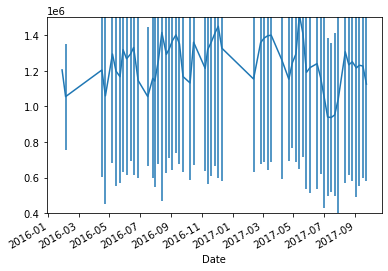

In [28]:
meanData['Price'].plot(yerr = value['Price'],ylim = (400000, 1500000))

<AxesSubplot:xlabel='Date'>

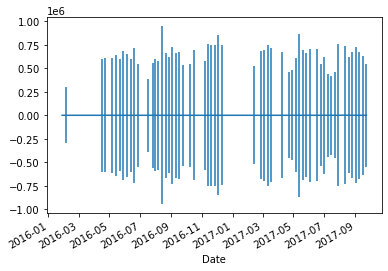

In [30]:
meanData ['Landsize'].plot (yerr = value['Price'])

In [31]:
fmeans = melbourne_data[(melbourne_data['Type']=='h')& (melbourne_data['Distance']<14)].sort_values('Date',ascending=False).groupby('Date').mean()
fstd = melbourne_data[(melbourne_data['Type']=='h') & (melbourne_data['Distance']<14)].sort_values('Date',ascending=False).groupby('Date').std()

<AxesSubplot:xlabel='Date'>

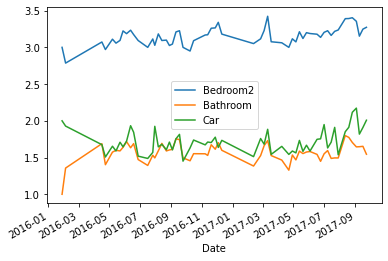

In [150]:
fmeans[['Bedroom2', 'Bathroom', 'Car']].plot ()

<AxesSubplot:xlabel='Date'>

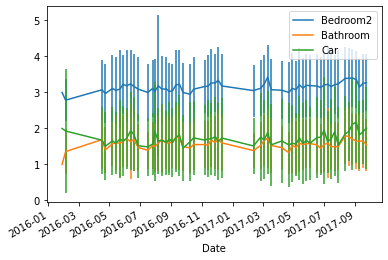

In [32]:
fmeans [['Bedroom2', 'Bathroom', 'Car']].plot (yerr = fstd)

In [33]:
flocation = melbourne_data [(melbourne_data['Type'] == 'h') & (melbourne_data ['Distance'] < 14)].sort_values('Date', ascending = False).dropna().groupby (['Suburb']).mean()

In [38]:
feature_region_mean = melbourne_data [(melbourne_data ['Type'] == 'h') & (melbourne_data ['Distance'] < 14)].sort_values ("Date", ascending = False).dropna().groupby('Regionname').mean ()

In [39]:
fregionstd = melbourne_data [(melbourne_data['Type'] == 'h') & (melbourne_data ['Distance'] < 14)].sort_values ("Date", ascending=False).dropna().groupby("Regionname").std()

<AxesSubplot:xlabel='Regionname'>

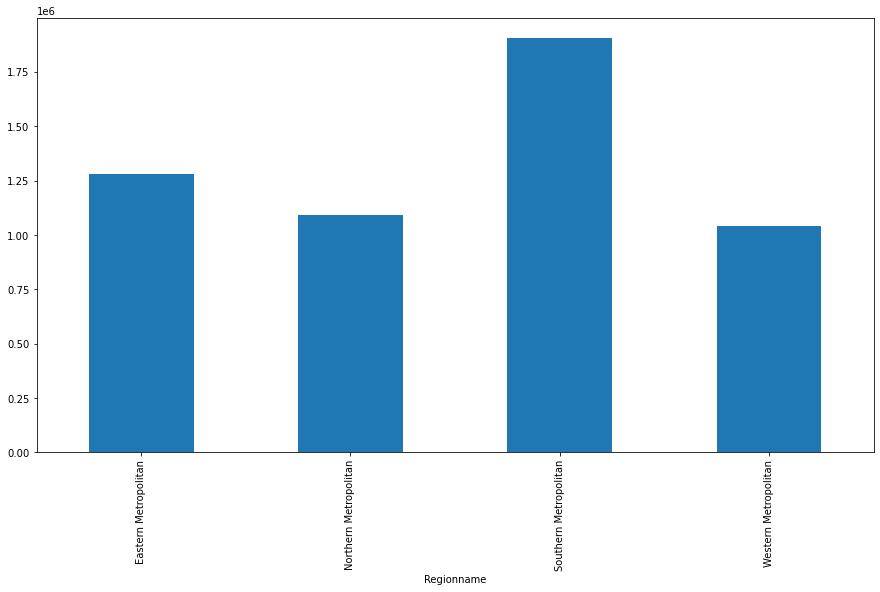

In [40]:
feature_region_mean ['Price'].plot (kind='bar', figsize = (15, 8))

<AxesSubplot:xlabel='Regionname'>

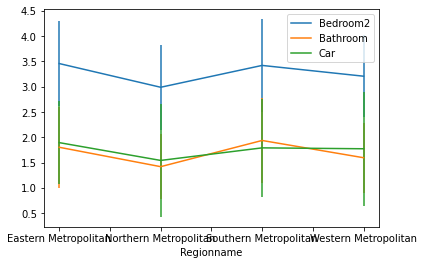

In [41]:
feature_region_mean[['Bedroom2', 'Bathroom', 'Car']].plot (yerr = fregionstd)

In [42]:
featureSouthern_M = melbourne_data[(melbourne_data['Regionname'] == 'Southern Metropolitan')&(melbourne_data['Type'] == 'h')&(melbourne_data ['Distance'] <= 14)].sort_values('Date', ascending=False).groupby("Suburb").mean ()

<AxesSubplot:xlabel='Suburb'>

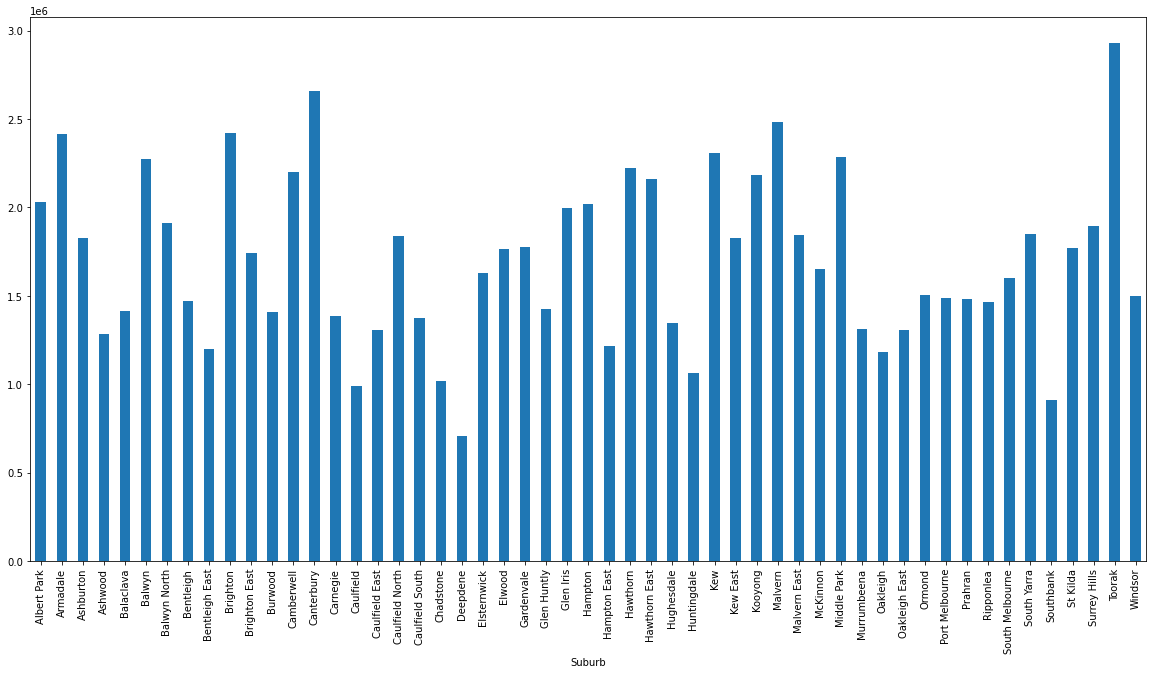

In [43]:
featureSouthern_M ['Price'].plot (kind = 'bar', figsize = (20, 10))

In [47]:
feature_South_Suburb = melbourne_data[(melbourne_data['Regionname']=='Southern Metropolitan')& 
                               (melbourne_data['Type']=='h') & 
                                (melbourne_data['Distance']<=14)].sort_values('Date',ascending=False).groupby('Suburb').agg({'Rooms':'median','Distance':'mean'})

In [48]:
feature_South_Suburb

,Rooms,Distance
Suburb,,
Albert Park,3.0,3.228571
Armadale,3.0,6.300000
Ashburton,3.0,10.771429
Ashwood,3.0,11.670588
Balaclava,3.0,6.542857
Balwyn,4.0,9.316000
Balwyn North,4.0,9.343836
Bentleigh,3.0,12.621505
Bentleigh East,3.0,13.879762


In [49]:
feature_West_Suburb = melbourne_data[(melbourne_data['Regionname']=='Western Metropolitan')& 
                               (melbourne_data['Type']=='h') & 
                                (melbourne_data['Distance']<=14)].sort_values('Date',ascending=False).groupby('Suburb').agg({'Rooms':'median','Distance':'mean'})

In [50]:
feature_West_Suburb

,Rooms,Distance
Suburb,,
Aberfeldie,4.0,8.600000
Airport West,3.0,12.584091
Albanvale,3.0,14.000000
Albion,3.0,13.115385
Altona,3.0,12.866667
Altona North,3.0,10.533333
Ardeer,3.0,12.800000
Ascot Vale,3.0,5.553608
Avondale Heights,3.0,10.261905


In [51]:
featrewesternM = melbourne_data [(melbourne_data ['Regionname'] == 'Western Metropolitan') & (melbourne_data ['Type'] == 'h') & melbourne_data ['Distance'] <= 14].sort_values ("Date", ascending = False).groupby ('Suburb').mean ()

<AxesSubplot:xlabel='Suburb'>

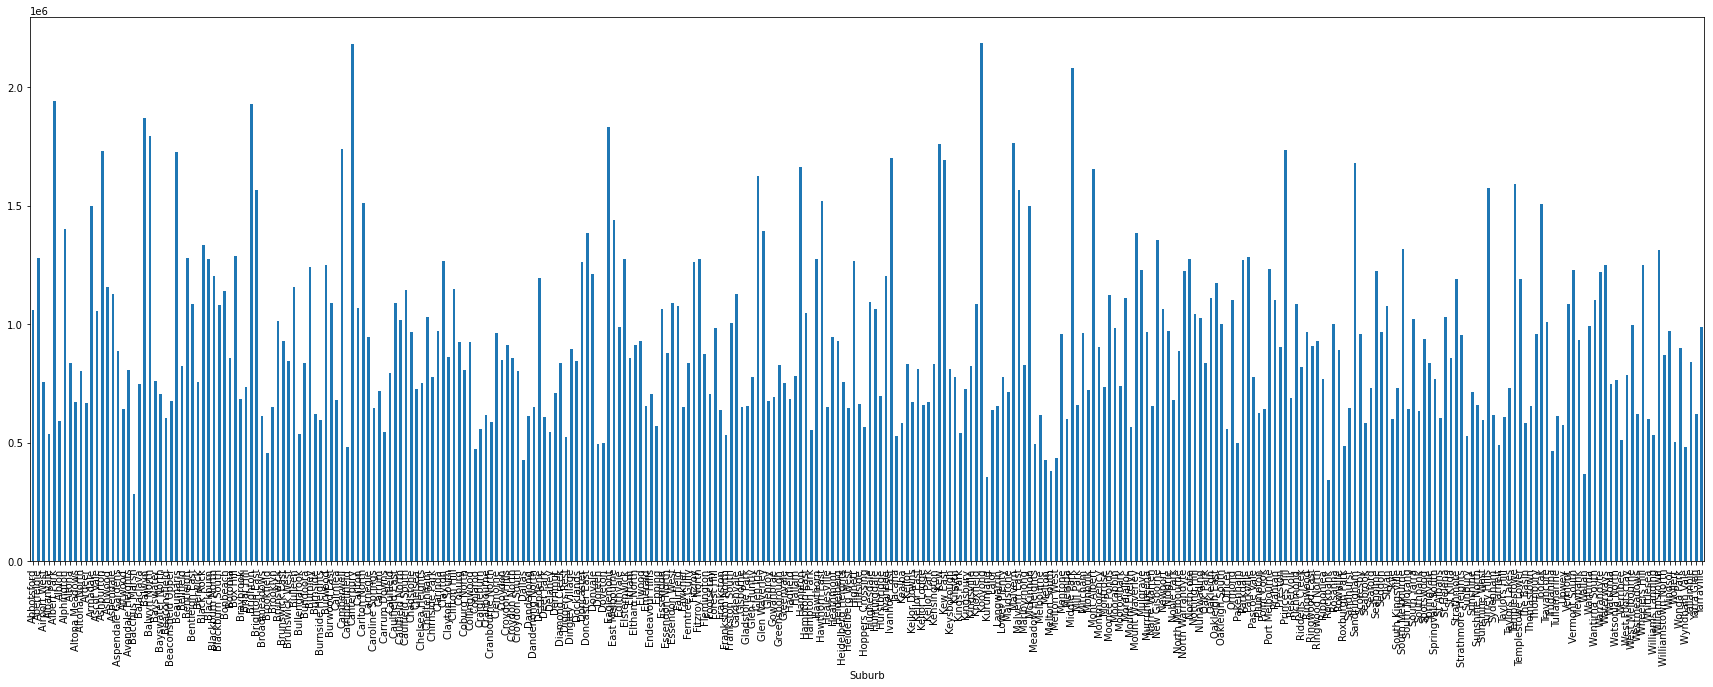

In [52]:
featrewesternM['Price'].plot (kind = 'bar', figsize = (30, 10))

In [53]:
southernaffrodable = melbourne_data [(melbourne_data ['Regionname'] == 'Southern Metropolitan') & (melbourne_data ['Rooms'] == 2) &
                                                                                                   (melbourne_data ['Type'] == 'h') & (melbourne_data['Distance'] <= 5)].sort_values('Date', ascending=False).groupby('Suburb').mean()

<AxesSubplot:xlabel='Suburb'>

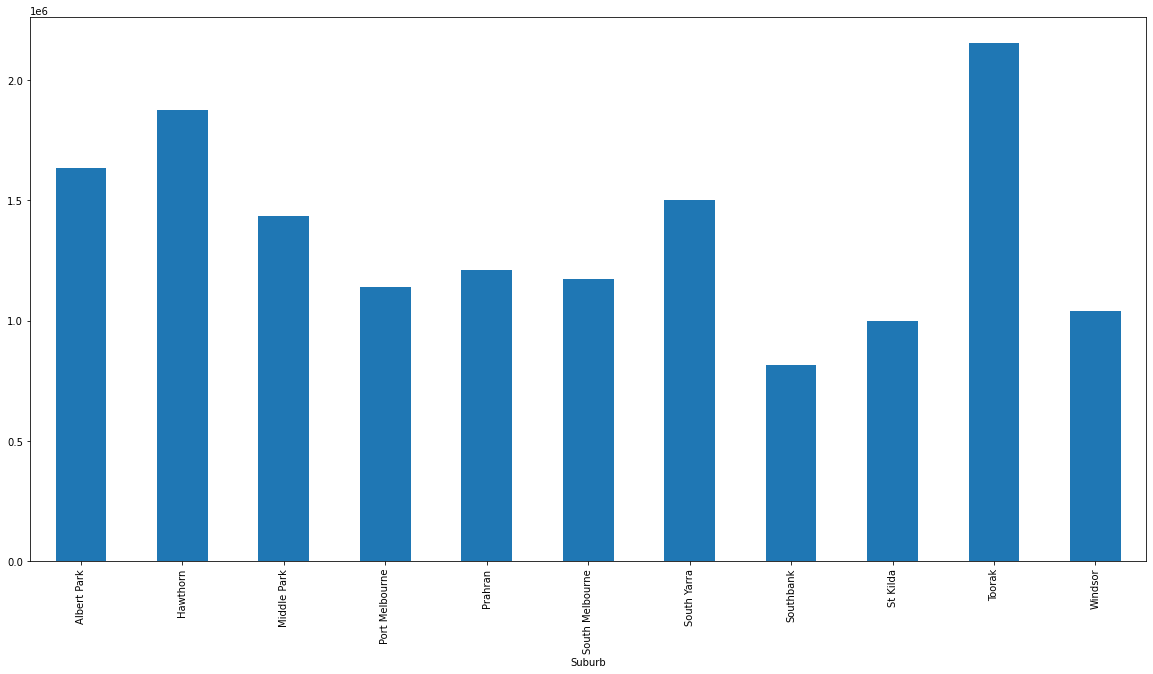

In [166]:
southernaffrodable['Price'].plot(kind='bar', figsize = (20, 10))

In [54]:
westernaffordable = melbourne_data[(melbourne_data['Regionname']=='Western Metropolitan')&
                                (melbourne_data['Rooms']==2)&
                                (melbourne_data['Type']=='h')&
                                (melbourne_data['Distance']<=6)].sort_values('Date',ascending=False).groupby('Suburb').mean()

<AxesSubplot:xlabel='Suburb'>

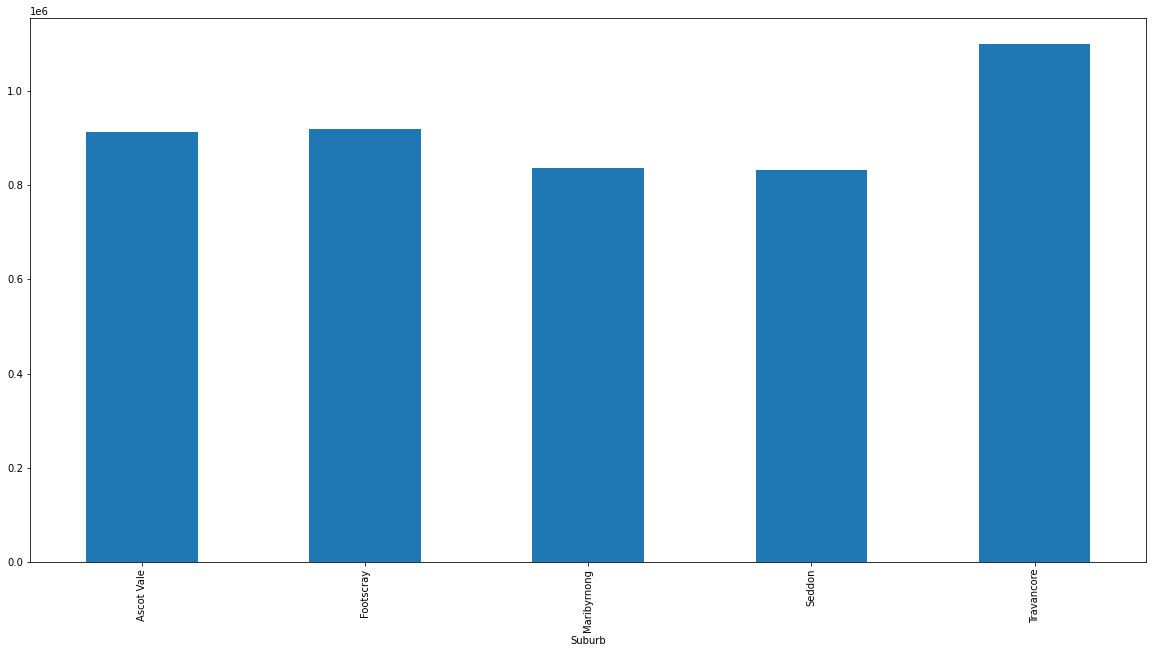

In [168]:
westernaffordable ['Price'].plot (kind = 'bar', figsize=(20, 10))

<AxesSubplot:xlabel='Price', ylabel='Density'>

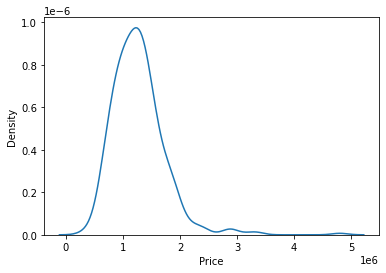

In [55]:
import seaborn as sb
sb.kdeplot(melbourne_data[(melbourne_data['Regionname']=='Southern Metropolitan')
                       &(melbourne_data['Type']=='h')
                       &(melbourne_data ['Rooms']==2)]
                       ["Price"])

<AxesSubplot:xlabel='Price', ylabel='Density'>

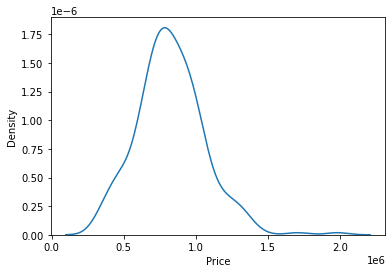

In [57]:
sb.kdeplot(melbourne_data [(melbourne_data['Regionname']=='Western Metropolitan')
                       &(melbourne_data['Type']=='h')
                       &(melbourne_data['Rooms']==2)]["Price"])

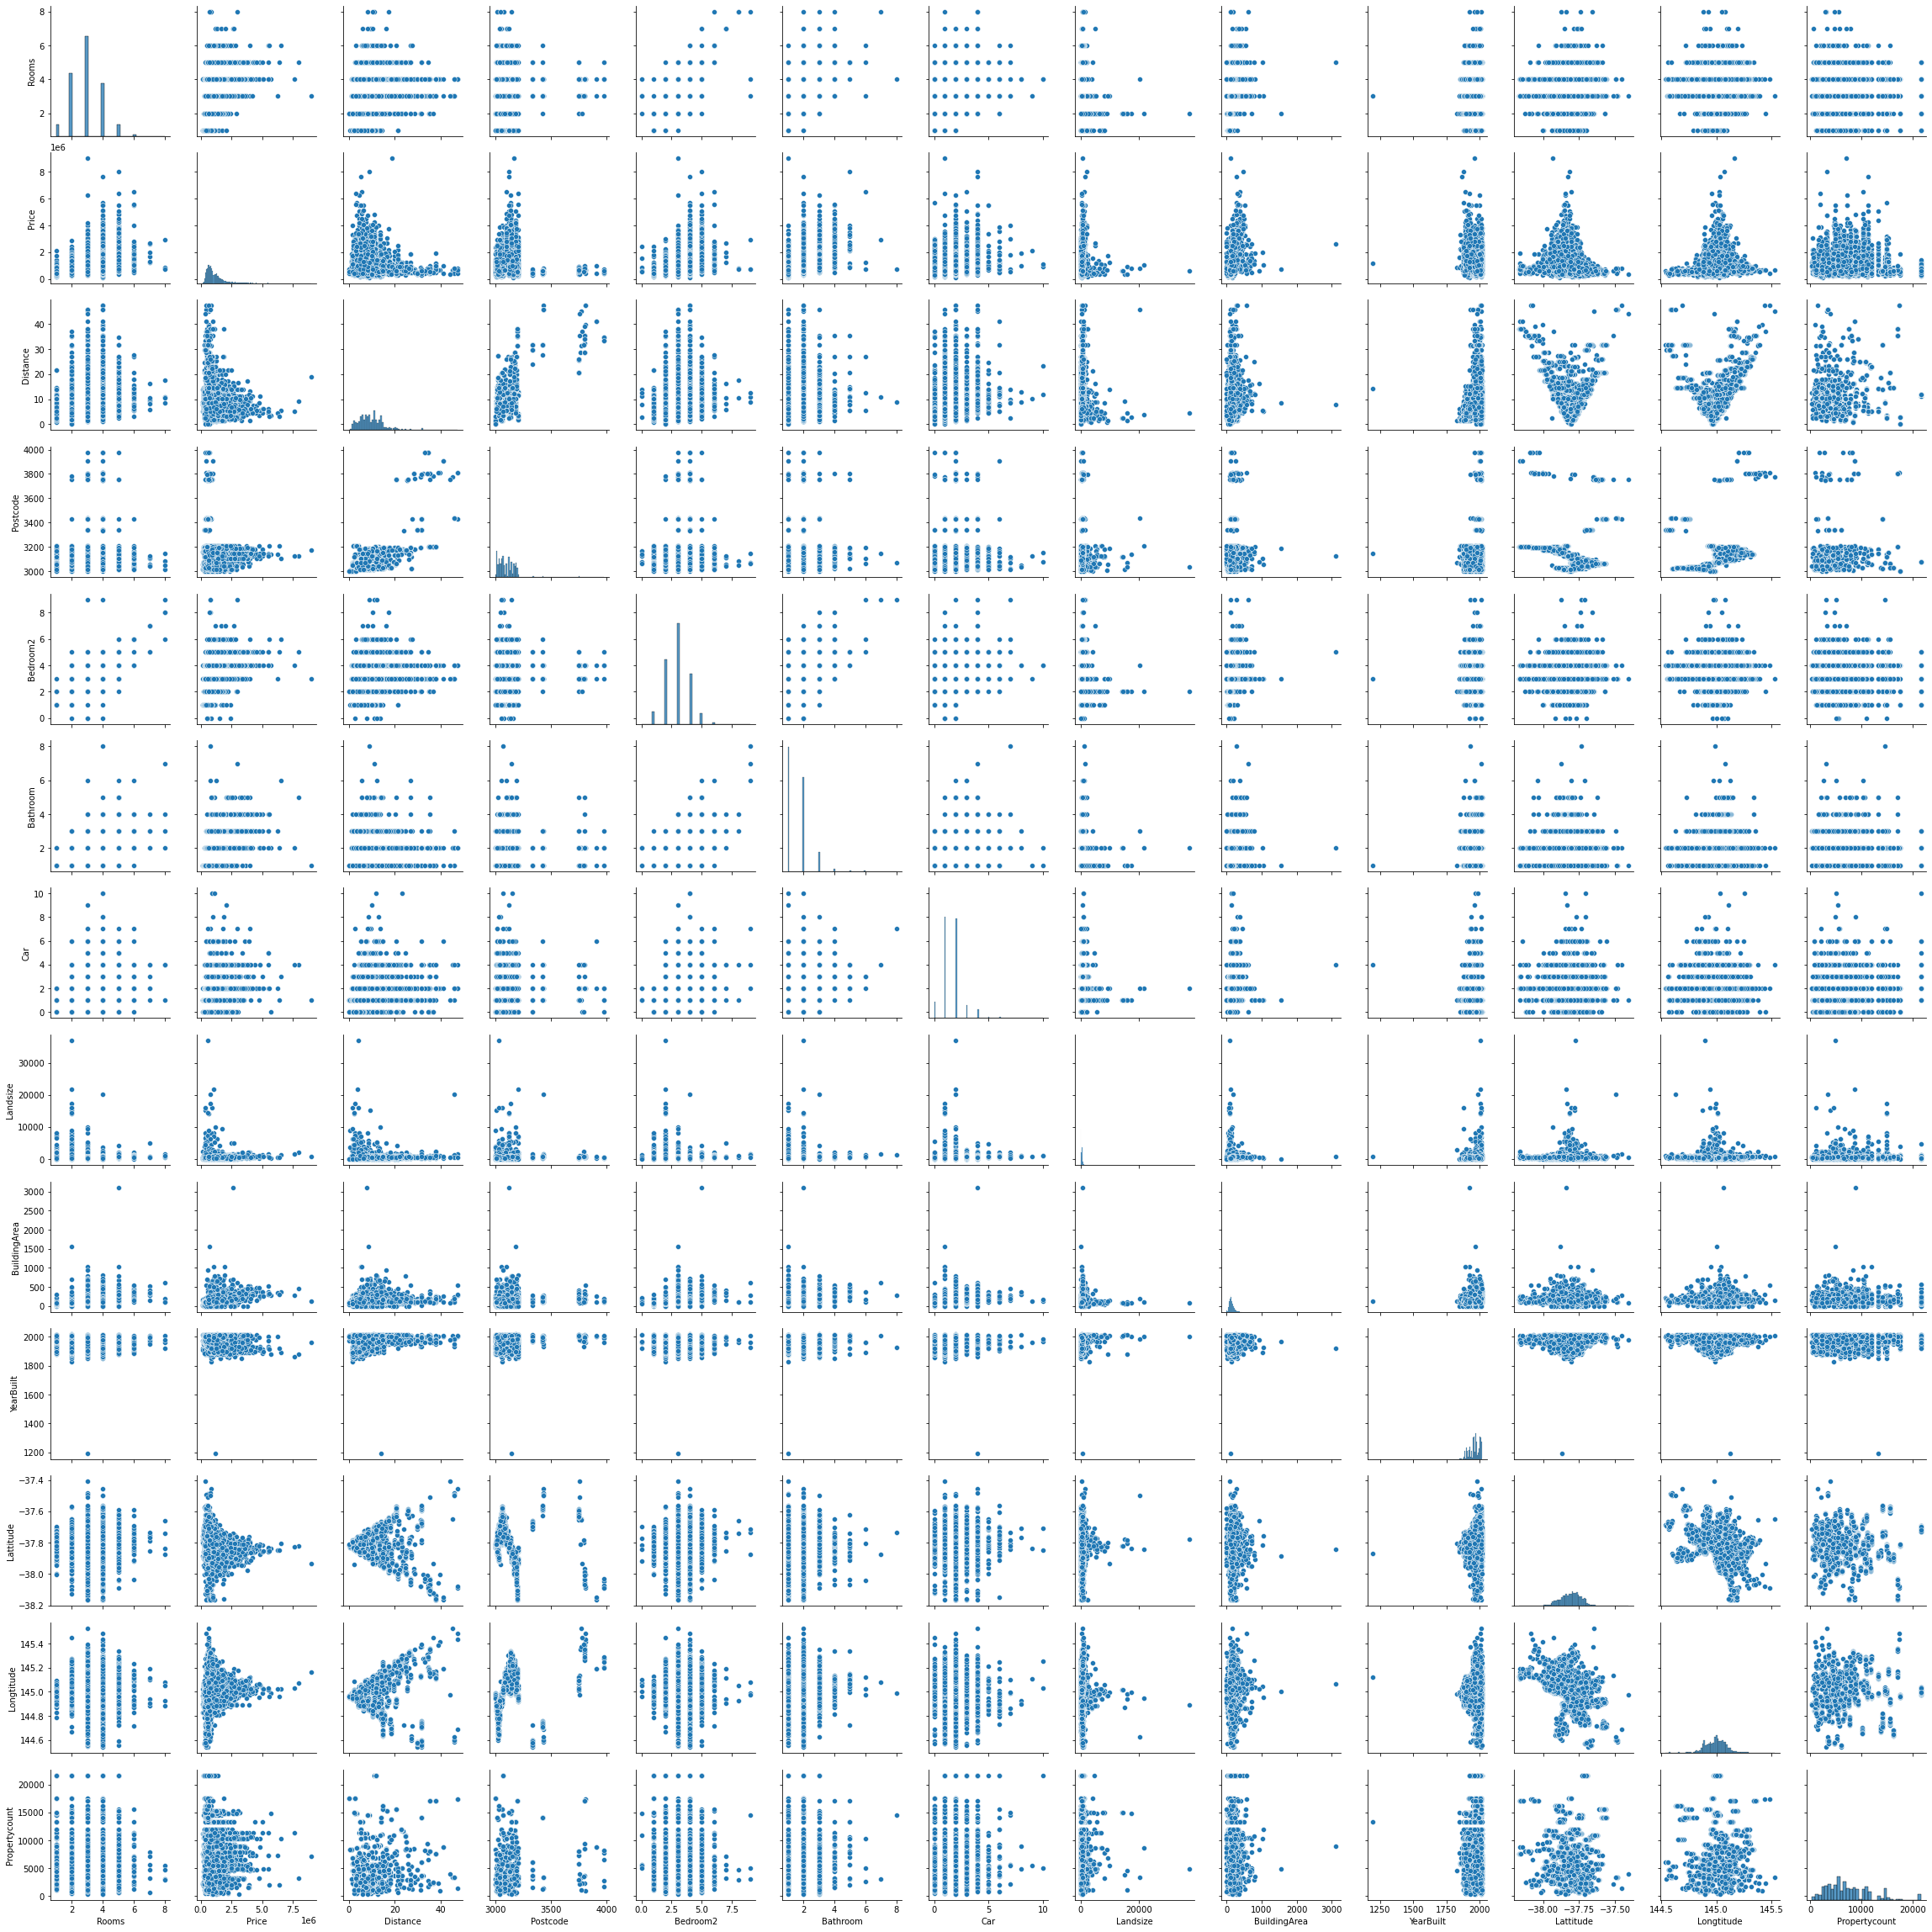

In [58]:
sb.pairplot (melbourne_data.dropna())

<AxesSubplot:>

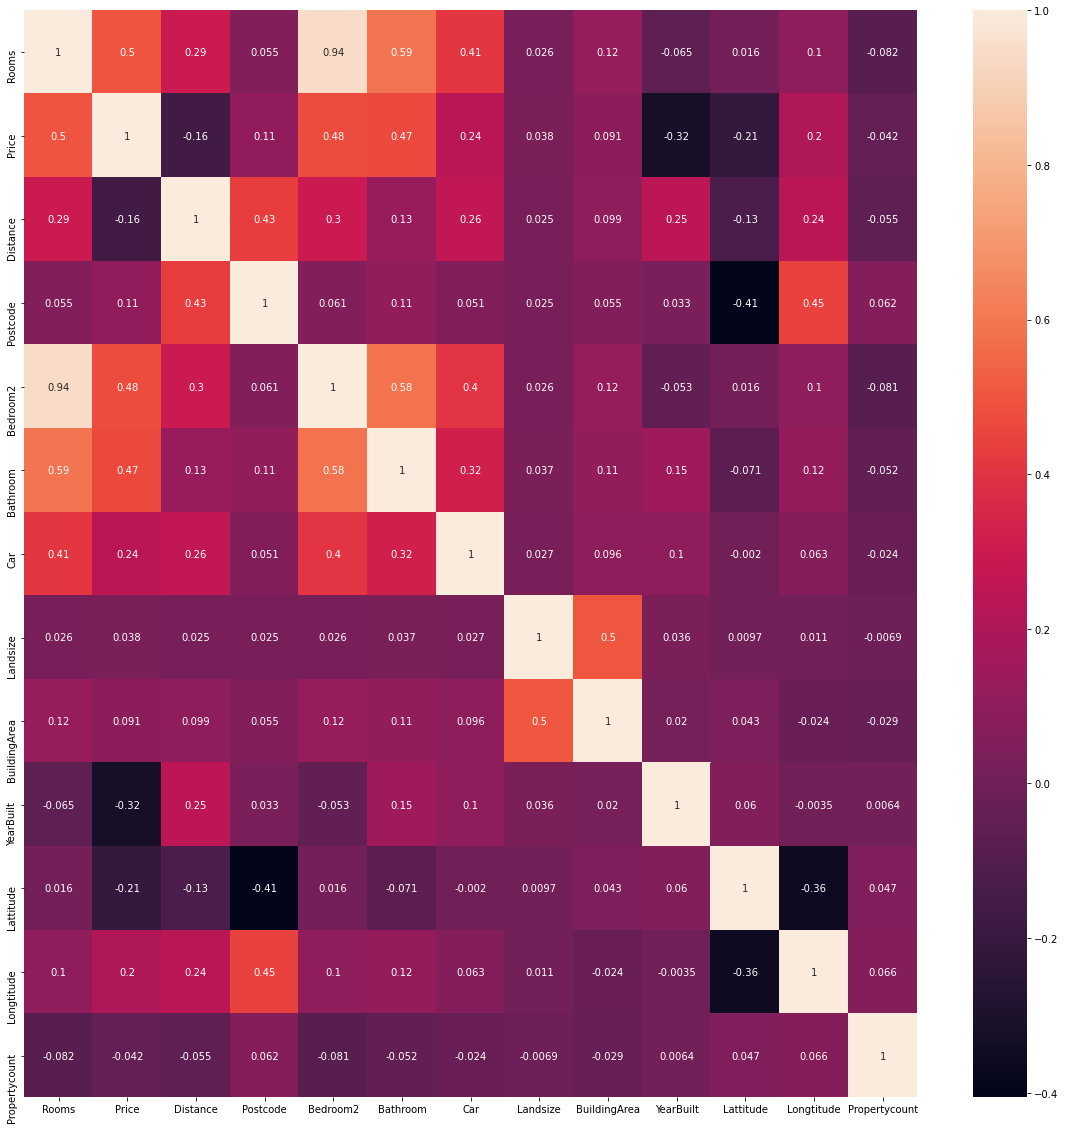

In [59]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize = (20, 20))
sb.heatmap (melbourne_data.corr (), annot=True)

In [60]:
data_frame_melbourne_data = melbourne_data.dropna().sort_values('Date')

In [61]:
from datetime import date
days_since_start = [(x-data_frame_melbourne_data ['Date'].min ()).days for x in data_frame_melbourne_data ["Date"]]
data_frame_melbourne_data ['Days'] = days_since_start

In [62]:
df_melbourne_data=data_frame_melbourne_data.drop(['Date','Address','SellerG','Postcode','Landsize','Propertycount'],axis=1)

In [63]:
df_melbourne_data.dtypes

Suburb           object
Rooms             int64
Type             object
Price             int64
Method           object
Distance        float64
Bedroom2          int64
Bathroom          int64
Car             float64
BuildingArea    float64
YearBuilt       float64
CouncilArea      object
Lattitude       float64
Longtitude      float64
Regionname       object
Days              int64
dtype: object

In [64]:
df_melbourne_data['CouncilArea'].value_counts()

Boroodara City Council    662
Moreland                  658
Boroondara                576
Moonee Valley             504
Darebin                   433
Glen Eira                 426
Maribyrnong               401
Yarra                     339
Port Phillip              336
Stonnington               335
Banyule                   279
Melbourne                 241
Bayside                   223
Hobsons Bay               220
Brimbank                  193
Monash                    175
Manningham                150
Whitehorse                139
Kingston                  111
Hume                       97
Whittlesea                 89
Wyndham                    47
Melton                     42
Knox                       42
Maroondah                  35
Frankston                  30
Greater Dandenong          21
Nillumbik                  18
Casey                      16
Yarra Ranges               10
Cardinia                    5
Macedon Ranges              5
Name: CouncilArea, dtype: int64

In [65]:
df_dummy_data = get_dummies(df_melbourne_data[['Type', 'Method', 'CouncilArea', 'Regionname']])

In [66]:
df_melbourne_data.columns

Index(['Suburb', 'Rooms', 'Type', 'Price', 'Method', 'Distance', 'Bedroom2',
       'Bathroom', 'Car', 'BuildingArea', 'YearBuilt', 'CouncilArea',
       'Lattitude', 'Longtitude', 'Regionname', 'Days'],
      dtype='object')

In [67]:
df_melbourne_data.drop (['Suburb', 'Type', 'Method', 'CouncilArea', 'Regionname'],axis = 1, inplace = True)
df_melbourne_data = df_melbourne_data.join(df_dummy_data)

In [68]:
df_melbourne_data.head(5)

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,BuildingArea,YearBuilt,Lattitude,Longtitude,...,CouncilArea_Yarra,CouncilArea_Yarra Ranges,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
1,2,1035000,2.5,2,1,0.0,79.0,1900.0,-37.8079,144.9934,...,1,0,0,0,1,0,0,0,0,0
143,2,720000,13.8,2,1,2.0,125.0,2013.0,-37.8687,144.8197,...,0,0,0,0,0,0,0,0,1,0
4156,3,1417250,14.6,3,2,2.0,180.0,1950.0,-37.9418,145.0549,...,0,0,0,0,0,0,0,1,0,0
2347,3,911000,8.0,3,2,2.0,98.0,2008.0,-37.7454,144.8987,...,0,0,0,0,0,0,0,0,1,0
1513,3,1755000,11.7,3,1,1.0,145.0,1970.0,-37.8540,145.1195,...,0,0,0,0,0,0,0,1,0,0


In [69]:
from sklearn.model_selection import train_test_split
X = df_melbourne_data.drop(['Price'], axis = 1)
y = df_melbourne_data ['Price']

In [70]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.30, random_state = 10)

In [71]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression ()
LR.fit (X_train, y_train)

LinearRegression()

In [72]:
print (LR.intercept_)

-55720200.91949289


In [73]:
LR.score (X_test, y_test)

0.6850914719802328

In [74]:
c_df = DataFrame (LR.coef_, columns=['Coefficient'])
ranked_suburbs = c_df.sort_values('Coefficient', ascending=False)
ranked_suburbs

,Coefficient
33,6.878996e+05
21,2.828949e+05
19,2.695781e+05
53,2.427335e+05
10,1.966040e+05
57,1.942467e+05
44,1.890558e+05
3,1.887752e+05
45,1.377643e+05
48,1.193818e+05


In [75]:
predictions = LR.predict(X_test)

(200000.0, 1000000.0)

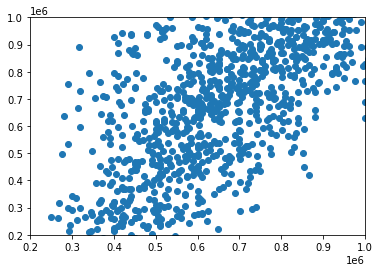

In [76]:
plt.scatter (y_test, predictions)
plt.ylim ([200000, 1000000])
plt.xlim ([200000, 1000000])